# Name : In-Sang Song
# Student ID : 2018120201

# Link to github : [assignment11 github](https://github.com/johnjunior65/assignment11.git)

## 과제의 조건으로 주어진 코드입니다.
# 과제의 조건과 다르게 한부분이 있습니다. 원래의 cau이미지는 1968x1347크기 입니다만, 그대로 코드를 수행할 시에는 컴퓨터의 성능 문제로 Dx, Dy를 계산하는데 너무 오래걸려서 cau이미지의 크기를 62x43크기로 줄여서 하였습니다.

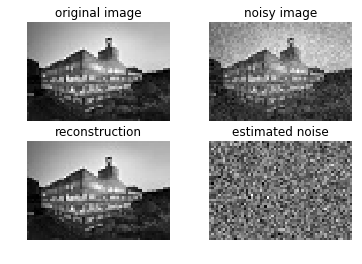

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

file_image = "C:\\Users\\johnjunior\\Desktop\\data\\cau.jpg"

im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)
im = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col) = im.shape

noise_std = 0.2
noise = np.random.normal(0, noise_std, (row, col))
im_noise = im + noise


im_recon = im 
noise_recon = im_noise - im_recon
error = np.linalg.norm(im - im_recon)

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(im_recon, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

## noise가 섞인 이미지 f를 g로 vectorization해주었습니다.
## j와 for문을 이용하여 Dx를, k1, k2와 for문을 이용하여 Dy를 만들어주었습니다.
# 이 Dx와 Dy를 구하는데 계산이 너무 오래걸려서 이미지의 크기를 줄였습니다. for문을 이용하여 만들었기 때문에, range값만 바꿔주면 크기가 큰 이미지에서의 Dx, Dy값을 얻을 수 있습니다.

In [3]:
g = im_noise.flatten('F')

j = np.linspace(0, 0, 2666)
j[0] = -1
j[43] = 1

Dx = j

for i in range(1, 2623, 1):
    Dx = np.vstack([Dx, np.roll(j,i)])

In [4]:
k1 = np.linspace(0,0, 2666)

k1[0] = -1
k1[1] = 1

k2 = k1

for i in range(1, 42, 1):
    k2 = np.vstack([k2, np.roll(k1, i)])
    
Dy = k2

for i in range(1, 62, 1):
    Dy = np.vstack([Dy, np.roll(k2, i * 43, axis = 1)])

In [5]:
display(Dx)
display(Dy)

array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

## least square를 사용하기 위해 A와 b를 구하고, 이전에서 사용했던 least square 공식을 이용해 v를 구하였습니다.

## 처음은 lambda값을 0.2로하여 구하였습니다.

In [1]:
import math

Dxm = np.asmatrix(Dx)
Dym = np.asmatrix(Dy)
gm = np.asmatrix(g)

l = np.linspace(0, 0, 5227)
lm = np.asmatrix(l)

lam = 0.2

A1 = np.vstack([np.identity(2666), math.sqrt(lam) * Dxm])
A = np.vstack([A1, math.sqrt(lam) * Dym])

b = np.vstack([gm.T, lm.T])

NameError: name 'np' is not defined

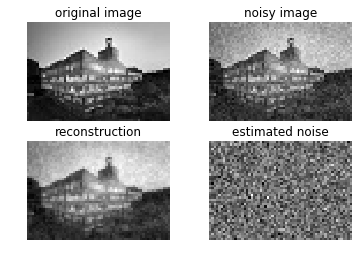

In [10]:
vm = (A.T * A).I * A.T * b
v = np.asarray(vm)

u1 = np.reshape(v, (43,62), order='F')

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(u1, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

## lambda값을 0으로 하여 구하여보았습니다.

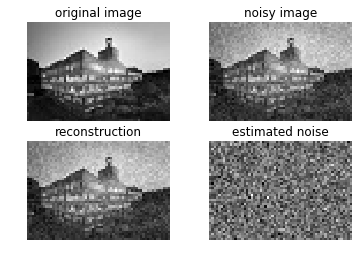

In [12]:
lam = 0

A1 = np.vstack([np.identity(2666), math.sqrt(lam) * Dxm])
A = np.vstack([A1, math.sqrt(lam) * Dym])

b = np.vstack([gm.T, lm.T])

vm = (A.T * A).I * A.T * b
v = np.asarray(vm)

u0 = np.reshape(v, (43,62), order='F')

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(u0, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

## lambda 0, 0.2, 0.6, 1.0일때의 각각의 이미지를 비교해볼수 있게 했습니다.

In [15]:
lam = 0.6

A1 = np.vstack([np.identity(2666), math.sqrt(lam) * Dxm])
A = np.vstack([A1, math.sqrt(lam) * Dym])

b = np.vstack([gm.T, lm.T])

vm = (A.T * A).I * A.T * b
v = np.asarray(vm)

u2 = np.reshape(v, (43,62), order='F')

In [16]:
lam = 1.0

A1 = np.vstack([np.identity(2666), math.sqrt(lam) * Dxm])
A = np.vstack([A1, math.sqrt(lam) * Dym])

b = np.vstack([gm.T, lm.T])

vm = (A.T * A).I * A.T * b
v = np.asarray(vm)

u3 = np.reshape(v, (43,62), order='F')

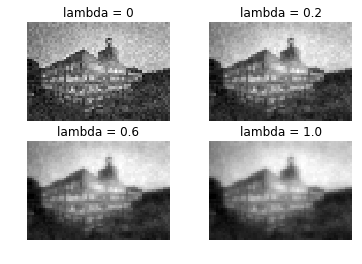

In [17]:
p1 = plt.subplot(2,2,1)
p1.set_title('lambda = 0')
plt.imshow(u0, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('lambda = 0.2')
plt.imshow(u1, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('lambda = 0.6')
plt.imshow(u2, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('lambda = 1.0')
plt.imshow(u3, cmap='gray')
plt.axis('off')

plt.show()